# PCA (Principal Component Analysis)

 * It is dimensionality technique to reduce the dimensions of large datasets having muliple features/columns
 * It is an unsupervised dimensionality reduction technique

**We can do PCA in two methods:**
 * **[Linear Algebra Method](#Linear_Algebra_Method)**
 * **[Sklearn Method](#Sklearn)**

____

**Things to consider in PCA**
* Exclude categorical variables (avoid encoding and performing PCA on them). PCA is for Numerical varibles only
 * Remove categorical variables from the dataset.
 
 
* Null values Treatment
 * Impute or drop null values if present.
 
 
* [Address outliers](#Outier)
 *  Apply appropriate treatments such as capping or removing outliers.
 
 
* [Scaling the data](#scaling)


* [Differnet Methods for Selecting Principal Components](#Differnet_Methods_for_Selecting_Principal_Components)


<a id="Linear_Algebra_Method" ></a>
      
# Linear Algebra Method

In [275]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from warnings import filterwarnings
filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler



from sklearn.decomposition import PCA

In [276]:
#Load the dataset
df_Attrition= pd.read_csv("Attrition.csv")


#lets create a copy of the above dataframe 
df= df_Attrition.copy()

#lets see the dataset
df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,53,124,2,38,7525,23537,2,12,30,2,15,7,6,12,0
1,21,337,7,31,2679,4567,1,13,1,3,1,0,1,0,1
2,36,1218,9,82,3407,6986,7,23,10,4,5,3,0,3,1
3,38,1391,10,66,2684,12127,0,17,3,0,2,1,0,2,0
4,24,1476,4,42,4162,15211,1,12,5,3,5,4,0,3,0


In [277]:
# Understanding the shape
df.shape
print(f"No of rows = {df.shape[0]} and No of columns = {df.shape[1]}")

No of rows = 2233 and No of columns = 15


In [278]:
# checking the data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2233 non-null   int64
 1   DailyRate                2233 non-null   int64
 2   DistanceFromHome         2233 non-null   int64
 3   HourlyRate               2233 non-null   int64
 4   MonthlyIncome            2233 non-null   int64
 5   MonthlyRate              2233 non-null   int64
 6   NumCompaniesWorked       2233 non-null   int64
 7   PercentSalaryHike        2233 non-null   int64
 8   TotalWorkingYears        2233 non-null   int64
 9   TrainingTimesLastYear    2233 non-null   int64
 10  YearsAtCompany           2233 non-null   int64
 11  YearsInCurrentRole       2233 non-null   int64
 12  YearsSinceLastPromotion  2233 non-null   int64
 13  YearsWithCurrManager     2233 non-null   int64
 14  Attrition                2233 non-null   int64
dtypes: i

In [279]:
#checking for null values
df.isnull().sum()

Age                        0
DailyRate                  0
DistanceFromHome           0
HourlyRate                 0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

In [280]:
#5 point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2233.0,35.902373,9.700181,18.0,29.0,34.0,42.0,60.0
DailyRate,2233.0,778.722347,398.022183,102.0,438.0,754.0,1122.0,1499.0
DistanceFromHome,2233.0,9.758173,8.257489,1.0,2.0,8.0,15.0,29.0
HourlyRate,2233.0,65.445141,20.189687,30.0,49.0,65.0,83.0,100.0
MonthlyIncome,2233.0,5939.328706,4474.240318,1009.0,2642.0,4508.0,7587.0,19999.0
MonthlyRate,2233.0,14480.544111,7140.551664,2094.0,8423.0,14618.0,20898.0,26999.0
NumCompaniesWorked,2233.0,2.738468,2.539761,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,2233.0,15.171070,3.714054,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2233.0,10.433498,7.957390,0.0,5.0,9.0,14.0,40.0
TrainingTimesLastYear,2233.0,2.742051,1.288115,0.0,2.0,3.0,3.0,6.0


In [281]:
# dropping/seperting categorical variables from the dataset
df.drop(columns="Attrition",inplace=True)

# checking dataframe after removing categorical columns 
print(len(df.columns), df.columns ,sep="\n")

14
Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


<a id="Outier"></a>
## Outlier Treatment

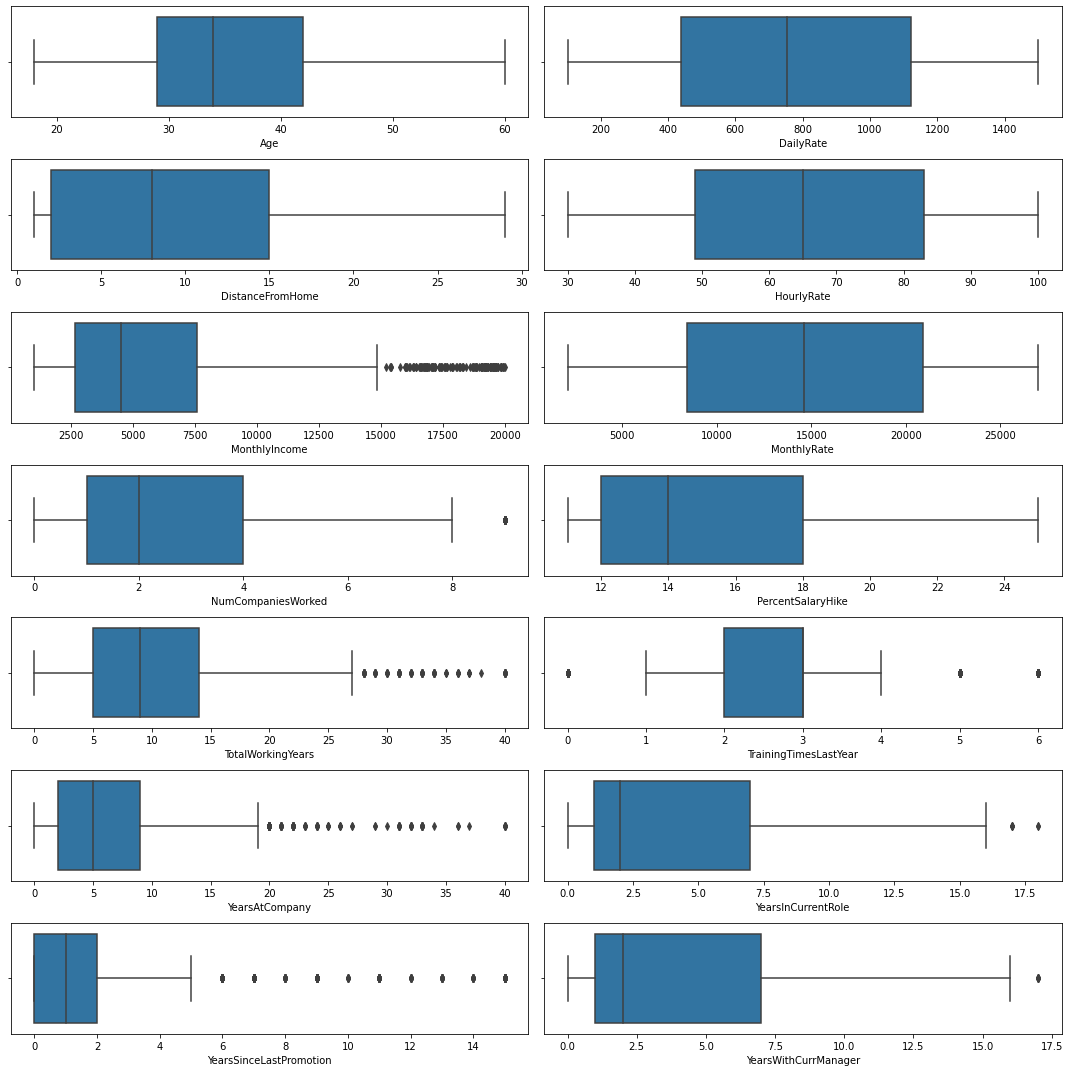

In [282]:
# checking for ouliers using visualizations like box plot

plt.figure(figsize=(15,15))
t=1
for i in df.columns:
    plt.subplot(7, 2,t)
    sns.boxplot(data=df, x=i)
    t=t+1
plt.tight_layout()
plt.show()

In [283]:
# checking for ouliers using statistical methods : interquartile range
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

In [284]:
df[((df>upper_limit) | (df<lower_limit)).any(axis=1)]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,53,124,2,38,7525,23537,2,12,30,2,15,7,6,12
3,38,1391,10,66,2684,12127,0,17,3,0,2,1,0,2
11,29,1396,10,99,2642,2755,1,11,1,6,1,0,0,0
15,36,1467,11,92,9738,22952,0,14,10,6,9,7,2,8
19,43,1291,15,65,17603,3525,1,24,14,3,14,10,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,31,218,7,100,6929,12241,4,11,10,3,8,7,7,7
2219,50,1246,3,99,18200,7999,1,11,32,2,32,5,10,7
2220,39,105,9,87,19431,15302,2,13,21,3,6,0,1,3
2224,50,1126,1,66,17399,6615,9,22,32,1,5,4,1,3


In [285]:
# Removing ouliers

df= df[~((df>upper_limit) | (df<lower_limit)).any(axis=1)]

#checking shape after removing outiers
df.shape

(1408, 14)

<AxesSubplot:>

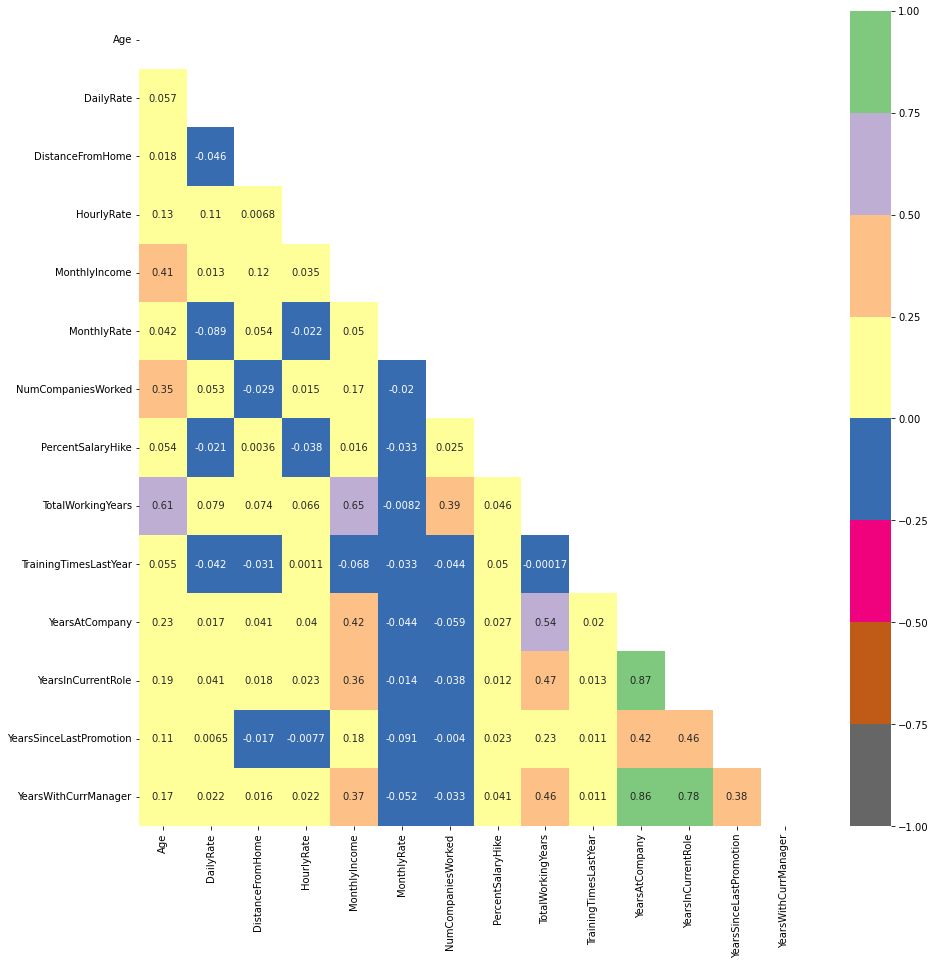

In [286]:
#checking the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1 , mask= np.triu(df.corr()), cmap="Accent_r")

we can see there is some multicolinearity

PCA can help mitigate multicollinearity in a dataset by transforming the original variables into a new set of uncorrelated variables

<a id="scaling"> </a>
### Scaling the data

In [287]:
#Intializing
scale = StandardScaler()

In [288]:
scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(scaled,columns=df.columns)
df_scaled.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.457931,-1.118181,-0.379549,-1.721426,-0.681773,-1.410617,-0.660119,-0.639905,-1.314809,0.607322,-0.983642,-1.031177,0.078734,-0.993318
1,0.222094,1.096227,-0.142036,0.826490,-0.416482,-1.066038,2.074891,2.020225,0.401254,1.941345,0.092479,0.003675,-0.748557,0.031792
2,-1.121926,1.744714,-0.735819,-1.171876,-0.141351,0.105588,-0.660119,-0.905918,-0.552114,0.607322,0.092479,0.348625,-0.748557,0.031792
3,-0.113911,1.259605,-0.973332,-0.172693,0.217595,-0.537417,2.530726,-0.107879,0.973275,-0.726702,1.706660,1.383477,0.078734,1.398605
4,2.686130,-1.238830,-0.973332,-0.722243,-0.754656,1.674784,0.707386,2.286238,-0.170767,1.941345,-0.983642,-1.031177,-0.748557,-0.993318


## Steps in Linear Algebra Method in PCA

 * Lets use the scaled data for PCA

In [289]:
# Create a covariance matrix

# Make sure you take the transpose the scaled data

Matrix = np.cov(df_scaled.T)

# lets see the first 5 

Matrix[0:5]

array([[ 1.00071073,  0.05658314,  0.01840857,  0.12796906,  0.41143257,
         0.04176613,  0.35484881,  0.05453249,  0.61108312,  0.05542462,
         0.23161567,  0.19340184,  0.1090745 ,  0.17001044],
       [ 0.05658314,  1.00071073, -0.04556209,  0.10577946,  0.01346182,
        -0.0890012 ,  0.05343065, -0.02144321,  0.07927482, -0.04236076,
         0.01719977,  0.0410121 ,  0.00653706,  0.02233909],
       [ 0.01840857, -0.04556209,  1.00071073,  0.00676772,  0.1185442 ,
         0.0542943 , -0.02911319,  0.00357156,  0.07367377, -0.03066576,
         0.04066588,  0.01845734, -0.0165303 ,  0.01602643],
       [ 0.12796906,  0.10577946,  0.00676772,  1.00071073,  0.03452567,
        -0.02215525,  0.01509853, -0.03848806,  0.06555828,  0.00112401,
         0.04032186,  0.02270662, -0.0077493 ,  0.02193443],
       [ 0.41143257,  0.01346182,  0.1185442 ,  0.03452567,  1.00071073,
         0.04997848,  0.17269494,  0.01614188,  0.65361256, -0.06842478,
         0.42108948,  0.36

In [290]:
# finding eigen value and eigen vector using the covariance matrix 

eigen_value, eigen_vector = np.linalg.eig(Matrix)

In [291]:
#lets see eigen_values which is amount of variations
pd.DataFrame(eigen_value)

,0
0,3.797205
1,1.732625
2,0.093285
3,0.235201
4,0.213839
5,0.497150
6,0.635941
7,1.190463
8,1.111661
9,0.739272


In [292]:
#lets see eigen_vectors
pd.DataFrame(eigen_vector.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.256032,0.034376,0.035204,0.039652,0.337223,-0.018897,0.089946,0.028575,0.403405,0.003140,0.456108,0.432875,0.263617,0.424048
1,-0.478831,-0.092815,-0.049658,-0.119721,-0.259468,-0.084162,-0.536008,-0.029415,-0.345221,0.047970,0.252125,0.272799,0.228481,0.266574
2,-0.007346,-0.022748,0.009157,0.011296,-0.022540,-0.016719,-0.082669,-0.001476,0.156300,0.001056,-0.816475,0.433786,-0.014361,0.334894
3,0.302873,0.033483,0.022936,-0.014083,0.357136,-0.025112,0.201223,-0.003305,-0.803211,0.020136,-0.054206,0.019679,-0.014977,0.297726
4,-0.017127,0.013460,0.003354,-0.001377,-0.099866,0.047465,-0.062228,-0.026436,0.165461,-0.004265,-0.061664,-0.703096,0.103022,0.668251
5,0.715810,-0.028925,0.081296,-0.142159,-0.574535,-0.053914,-0.260997,-0.044461,-0.042659,-0.179237,0.081685,0.078222,-0.097637,0.024443
6,-0.253766,-0.045930,0.153356,0.077213,-0.477632,0.074900,0.620861,0.004078,-0.051385,0.022929,0.171959,0.202812,-0.368544,0.274029
7,0.025319,0.548874,-0.451269,0.331546,-0.191248,-0.556469,0.106367,0.001080,-0.023879,0.107409,-0.011756,0.004974,0.121166,0.005500
8,-0.100148,0.325559,0.225906,0.379163,0.082124,0.181222,-0.136112,-0.571205,-0.033065,-0.541719,0.027932,0.036257,-0.089198,0.013859
9,0.029996,0.098636,0.217682,0.067584,-0.272306,0.295691,0.281811,0.014331,-0.101096,0.026818,-0.123329,-0.002810,0.804662,-0.150245


<a id=Differnet_Methods_for_Selecting_Principal_Components > </a>
### Now lets see what are the ways through which we can select the Principal components :

 * **Scree Plot**
   * A graphical representation used in exploratory factor analysis to determine the number of factors to retain based on the eigenvalues of the factors.
   
   
 * **Kaiser–Guttman Rule**
    * A guideline in factor analysis suggesting retaining factors with eigenvalues greater than 1, indicating they explain more variance than a single original variable.
 
 
 * **General Business Guidelines**
    *  Establish a criterion wherein the cumulative variance explained by a model or analysis must exceed 80%

**Scree plot** 
 * For plotting scree plot first we need to sort the eigen values in Descending order 
 * Select the number of Principal Components based when there is sharp decrease in the eigen value

In [293]:
df_eigen = pd.DataFrame(sorted(eigen_value,reverse=True))
df_eigen

,0
0,3.797205
1,1.732625
2,1.190463
3,1.111661
4,1.012301
5,0.977785
6,0.914578
7,0.858642
8,0.739272
9,0.635941


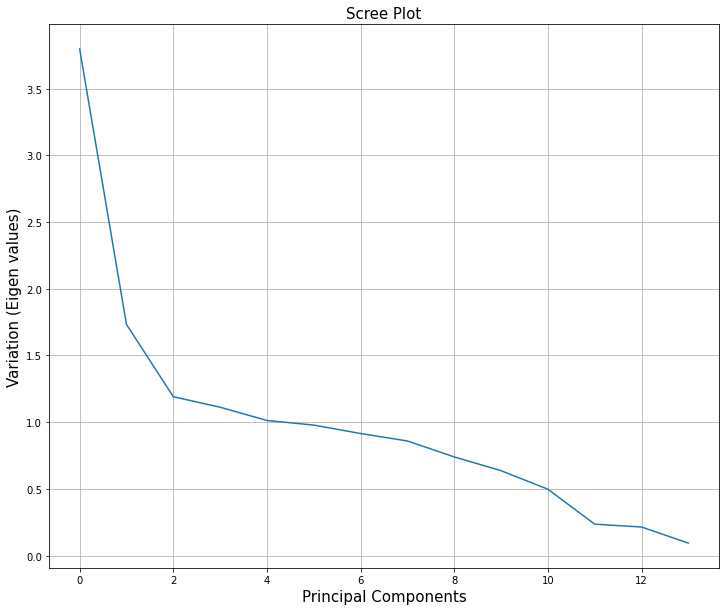

In [294]:
plt.figure(figsize=(12,10))
plt.plot(df_eigen)
plt.title("Scree Plot",fontsize=15)
plt.xlabel("Principal Components",fontsize=15)
plt.ylabel("Variation (Eigen values)",fontsize=15)
plt.grid()

___

**Kaiser–Guttman Rule**
 * Take number of components whose eigen values are greater than 1

In [295]:
Kaiser_components = eigen_value[eigen_value>1]
Kaiser_components

array([3.79720545, 1.732625  , 1.19046275, 1.11166142, 1.0123013 ])

___

**Based on General Business Guidelines**
 * Set the threshold for total variance explained to be greater than 80%.

**Note: This guideline is flexible and may vary, ranging from 80% to higher thresholds like 85%, 90%, etc.**

In [296]:
# lets find the cummulative variance

# Percentage Variance Explained

* make sure your eigen values are sorted in decending order

In [297]:
df_eigen

,0
0,3.797205
1,1.732625
2,1.190463
3,1.111661
4,1.012301
5,0.977785
6,0.914578
7,0.858642
8,0.739272
9,0.635941


In [298]:
(df_eigen/df_eigen.shape[0])

,0
0,0.271229
1,0.123759
2,0.085033
3,0.079404
4,0.072307
5,0.069842
6,0.065327
7,0.061332
8,0.052805
9,0.045424


In [299]:
Cummulative_variance_explained = np.cumsum(df_eigen/eigen_value.shape[0]*100)
Cummulative_variance_explained

,0
0,27.122896
1,39.498789
2,48.002094
3,55.942533
4,63.173257
5,70.157438
6,76.690138
7,82.823298
8,88.103813
9,92.646248


In [300]:

Cummulative_variance_explained.iloc[:8]

,0
0,27.122896
1,39.498789
2,48.002094
3,55.942533
4,63.173257
5,70.157438
6,76.690138
7,82.823298


 *  **Here lets take first 8 Principal components which explain a 82% variance which is above 80% as per business guidelines**

___

### Final step in PCA in Linear Algerbra Method

### *scaled data  * eigen vector*

#### dot
Compute the matrix multiplication between the DataFrame and other.

This method computes the matrix product between the DataFrame and the
values of an other Series, DataFrame or a numpy array.

In [301]:
df_pca = df_scaled.dot(eigen_vector)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.598219,1.402020,-0.075149,0.002159,-0.019999,-0.374647,-0.560270,-0.098521,-1.183902,-0.293629,-1.026125,0.304062,0.130156,-1.751534
1,0.274258,-1.457417,-0.153581,0.110476,-0.188240,-0.619746,1.675992,1.948521,-2.042845,-0.055429,1.144589,-1.021162,-0.504344,0.326547
2,-0.646145,1.135980,0.017372,0.013492,-0.274636,-0.435306,0.076622,0.758365,0.456341,-0.777629,-0.434419,0.703143,-2.194407,-0.065575
3,2.662568,-0.530233,-0.418355,0.142143,-0.157078,-0.561447,2.096688,1.499726,0.245439,-0.088275,-1.621069,0.334279,-0.397152,0.278081
4,-1.151289,-2.241028,-0.072207,0.507892,-0.006318,1.586265,-0.216696,-0.999233,-3.384591,0.370960,1.130866,0.998666,-0.215065,1.615090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1.319037,1.369045,-0.206310,-0.221555,0.348977,-0.264740,-0.304995,-0.491400,-0.594450,-0.418969,0.837253,1.940276,-2.002378,0.437049
1404,0.743038,-1.800827,0.446517,-0.729505,0.288961,-0.997940,-0.259852,1.907728,0.790225,0.990823,0.755538,-0.339639,-0.284919,-0.869055
1405,2.370410,-2.524442,0.051360,1.002409,-0.231401,0.784297,-1.668858,0.441945,1.218039,-1.761541,-1.428899,0.194439,0.287807,0.631784
1406,2.127956,-3.096396,0.441137,-0.754519,0.244986,-0.417364,-2.091524,0.541944,-1.595434,-0.639864,1.035876,0.746172,-1.101722,0.186279


___

In [302]:
# lets Rename the components
new_name= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
df_pca.rename(columns=dict(zip(df_pca.columns,new_name)),inplace=True)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-2.598219,1.402020,-0.075149,0.002159,-0.019999,-0.374647,-0.560270,-0.098521,-1.183902,-0.293629,-1.026125,0.304062,0.130156,-1.751534
1,0.274258,-1.457417,-0.153581,0.110476,-0.188240,-0.619746,1.675992,1.948521,-2.042845,-0.055429,1.144589,-1.021162,-0.504344,0.326547
2,-0.646145,1.135980,0.017372,0.013492,-0.274636,-0.435306,0.076622,0.758365,0.456341,-0.777629,-0.434419,0.703143,-2.194407,-0.065575
3,2.662568,-0.530233,-0.418355,0.142143,-0.157078,-0.561447,2.096688,1.499726,0.245439,-0.088275,-1.621069,0.334279,-0.397152,0.278081
4,-1.151289,-2.241028,-0.072207,0.507892,-0.006318,1.586265,-0.216696,-0.999233,-3.384591,0.370960,1.130866,0.998666,-0.215065,1.615090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1.319037,1.369045,-0.206310,-0.221555,0.348977,-0.264740,-0.304995,-0.491400,-0.594450,-0.418969,0.837253,1.940276,-2.002378,0.437049
1404,0.743038,-1.800827,0.446517,-0.729505,0.288961,-0.997940,-0.259852,1.907728,0.790225,0.990823,0.755538,-0.339639,-0.284919,-0.869055
1405,2.370410,-2.524442,0.051360,1.002409,-0.231401,0.784297,-1.668858,0.441945,1.218039,-1.761541,-1.428899,0.194439,0.287807,0.631784
1406,2.127956,-3.096396,0.441137,-0.754519,0.244986,-0.417364,-2.091524,0.541944,-1.595434,-0.639864,1.035876,0.746172,-1.101722,0.186279


 * Following the business rule, we conclude that the first 8 principal components should be retained, and therefore, we will drop the remaining components.

In [303]:
df_pca= df_pca.iloc[:, :8]
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.598219,1.402020,-0.075149,0.002159,-0.019999,-0.374647,-0.560270,-0.098521
1,0.274258,-1.457417,-0.153581,0.110476,-0.188240,-0.619746,1.675992,1.948521
2,-0.646145,1.135980,0.017372,0.013492,-0.274636,-0.435306,0.076622,0.758365
3,2.662568,-0.530233,-0.418355,0.142143,-0.157078,-0.561447,2.096688,1.499726
4,-1.151289,-2.241028,-0.072207,0.507892,-0.006318,1.586265,-0.216696,-0.999233
...,...,...,...,...,...,...,...,...
1403,1.319037,1.369045,-0.206310,-0.221555,0.348977,-0.264740,-0.304995,-0.491400
1404,0.743038,-1.800827,0.446517,-0.729505,0.288961,-0.997940,-0.259852,1.907728
1405,2.370410,-2.524442,0.051360,1.002409,-0.231401,0.784297,-1.668858,0.441945
1406,2.127956,-3.096396,0.441137,-0.754519,0.244986,-0.417364,-2.091524,0.541944


Therefore, having completed PCA using the linear algebra method, let's proceed to apply the sklearn method for comparison.

<a id="Sklearn"></a>
# PCA using Scikit-learn Method

In [304]:
#Intialize 
pca = PCA(random_state=10)

In [305]:
pca.fit_transform(df_scaled).T

array([[-2.59821915e+00,  2.74258129e-01, -6.46144774e-01, ...,
         2.37041001e+00,  2.12795554e+00,  1.26944355e-01],
       [-1.40201981e+00,  1.45741651e+00, -1.13598011e+00, ...,
         2.52444172e+00,  3.09639565e+00, -9.68055483e-01],
       [ 9.85212017e-02, -1.94852115e+00, -7.58364761e-01, ...,
        -4.41945252e-01, -5.41944337e-01,  3.74056818e-01],
       ...,
       [-2.15936186e-03, -1.10475819e-01, -1.34924424e-02, ...,
        -1.00240912e+00,  7.54518960e-01, -1.63462004e-01],
       [-1.99994933e-02, -1.88239540e-01, -2.74636236e-01, ...,
        -2.31400810e-01,  2.44986345e-01, -1.53048880e-02],
       [ 7.51485313e-02,  1.53581317e-01, -1.73718272e-02, ...,
        -5.13598318e-02, -4.41136956e-01, -2.67564656e-01]])

In [306]:
pd.DataFrame(eigen_vector)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.256032,-0.478831,-0.007346,0.302873,-0.017127,0.715810,-0.253766,0.025319,-0.100148,0.029996,0.122680,0.095156,0.024411,0.005944
1,0.034376,-0.092815,-0.022748,0.033483,0.013460,-0.028925,-0.045930,0.548874,0.325559,0.098636,-0.020328,-0.211546,-0.697794,0.190727
2,0.035204,-0.049658,0.009157,0.022936,0.003354,0.081296,0.153356,-0.451269,0.225906,0.217682,0.285885,-0.636015,-0.146447,-0.394704
3,0.039652,-0.119721,0.011296,-0.014083,-0.001377,-0.142159,0.077213,0.331546,0.379163,0.067584,0.617768,-0.041900,0.518735,0.216477
4,0.337223,-0.259468,-0.022540,0.357136,-0.099866,-0.574535,-0.477632,-0.191248,0.082124,-0.272306,-0.028916,-0.053551,-0.020346,-0.033433
5,-0.018897,-0.084162,-0.016719,-0.025112,0.047465,-0.053914,0.074900,-0.556469,0.181222,0.295691,0.175920,0.373292,-0.270233,0.554641
6,0.089946,-0.536008,-0.082669,0.201223,-0.062228,-0.260997,0.620861,0.106367,-0.136112,0.281811,-0.256697,0.082149,0.067860,-0.115396
7,0.028575,-0.029415,-0.001476,-0.003305,-0.026436,-0.044461,0.004078,0.001080,-0.571205,0.014331,0.025201,-0.567733,0.073588,0.583747
8,0.403405,-0.345221,0.156300,-0.803211,0.165461,-0.042659,-0.051385,-0.023879,-0.033065,-0.101096,-0.024502,0.006870,-0.034258,-0.054463
9,0.003140,0.047970,0.001056,0.020136,-0.004265,-0.179237,0.022929,0.107409,-0.541719,0.026818,0.634610,0.255925,-0.336166,-0.278678


In [307]:
pca.explained_variance_
#eigen values

# Here tthe eigenvalues are already sorted in descending order, 
# there's no need to perform an additional sorting step, unlike in the linear algebra approach.

array([3.79720545, 1.732625  , 1.19046275, 1.11166142, 1.0123013 ,
       0.97778541, 0.91457801, 0.8586424 , 0.73927204, 0.63594095,
       0.49715034, 0.23520102, 0.21383909, 0.09328506])

In [308]:
pd.DataFrame(pca.components_.T)
# eigen vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.256032,0.478831,-0.025319,0.100148,-0.122680,-0.095156,0.005944,0.024411,0.029996,-0.253766,0.715810,-0.302873,-0.017127,0.007346
1,0.034376,0.092815,-0.548874,-0.325559,0.020328,0.211546,0.190727,-0.697794,0.098636,-0.045930,-0.028925,-0.033483,0.013460,0.022748
2,0.035204,0.049658,0.451269,-0.225906,-0.285885,0.636015,-0.394704,-0.146447,0.217682,0.153356,0.081296,-0.022936,0.003354,-0.009157
3,0.039652,0.119721,-0.331546,-0.379163,-0.617768,0.041900,0.216477,0.518735,0.067584,0.077213,-0.142159,0.014083,-0.001377,-0.011296
4,0.337223,0.259468,0.191248,-0.082124,0.028916,0.053551,-0.033433,-0.020346,-0.272306,-0.477632,-0.574535,-0.357136,-0.099866,0.022540
5,-0.018897,0.084162,0.556469,-0.181222,-0.175920,-0.373292,0.554641,-0.270233,0.295691,0.074900,-0.053914,0.025112,0.047465,0.016719
6,0.089946,0.536008,-0.106367,0.136112,0.256697,-0.082149,-0.115396,0.067860,0.281811,0.620861,-0.260997,-0.201223,-0.062228,0.082669
7,0.028575,0.029415,-0.001080,0.571205,-0.025201,0.567733,0.583747,0.073588,0.014331,0.004078,-0.044461,0.003305,-0.026436,0.001476
8,0.403405,0.345221,0.023879,0.033065,0.024502,-0.006870,-0.054463,-0.034258,-0.101096,-0.051385,-0.042659,0.803211,0.165461,-0.156300
9,0.003140,-0.047970,-0.107409,0.541719,-0.634610,-0.255925,-0.278678,-0.336166,0.026818,0.022929,-0.179237,-0.020136,-0.004265,-0.001056


In [309]:
pd.DataFrame(pca.explained_variance_ratio_)
#eigen values percentage

,0
0,0.271036
1,0.123671
2,0.084973
3,0.079348
4,0.072256
5,0.069792
6,0.065281
7,0.061288
8,0.052768
9,0.045392


So now, we'll utilize the three methods discussed earlier to determine the principal components using Sklearn

In [310]:
# this step is simmilar to "Cummulative_variance_explained" step in linear algebra
np.cumsum(pca.explained_variance_ratio_*100)

array([ 27.10363263,  39.47073576,  47.96800187,  55.90280106,
        63.1283892 ,  70.10761034,  76.6356707 ,  82.76447476,
        88.04123898,  92.58044822,  96.12900002,  97.80781409,
        99.33415135, 100.        ])

### Lets plot Scree Plot

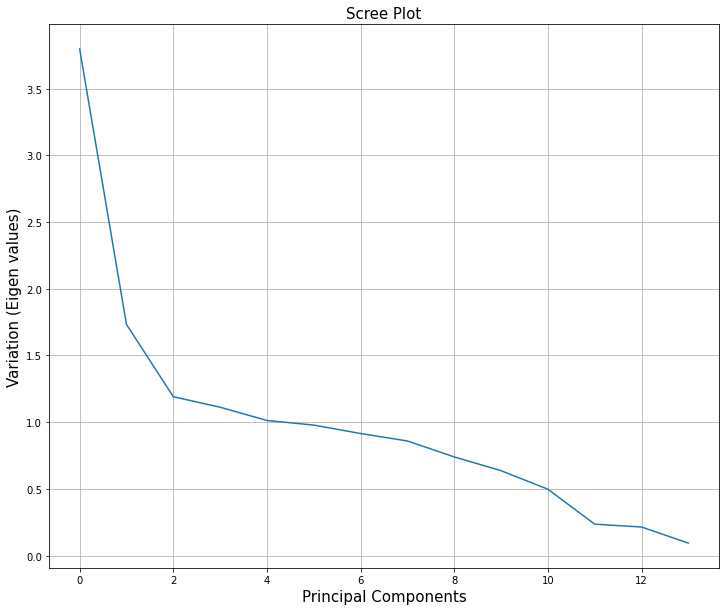

In [311]:
plt.figure(figsize=(12,10))
plt.plot(pca.explained_variance_)
plt.title("Scree Plot",fontsize=15)
plt.xlabel("Principal Components",fontsize=15)
plt.ylabel("Variation (Eigen values)",fontsize=15)
plt.grid()

### Kaiser Rule

In [312]:
evalues_sk=pd.DataFrame({"Eigen_Values_SK":pca.explained_variance_})
evalues_sk[evalues_sk["Eigen_Values_SK"]>1]

,Eigen_Values_SK
0,3.797205
1,1.732625
2,1.190463
3,1.111661
4,1.012301


Similarly, we can apply the business rule to select the desired number of principal components 

___